# Import Necessary libraries

In [28]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Import Data Set

In [29]:
data = pd.read_csv("WC_AT.csv")
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [30]:
import pandas_profiling as pp
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='wcATreport.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Understanding

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


# Correlation

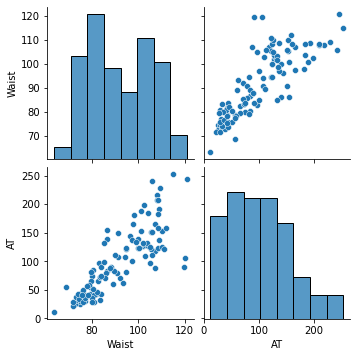

In [32]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data)

In [34]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<AxesSubplot:xlabel='Waist', ylabel='Density'>

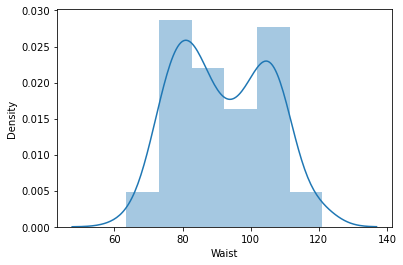

In [35]:
import seaborn as sns
sns.distplot(data['Waist'])

<AxesSubplot:xlabel='AT', ylabel='Density'>

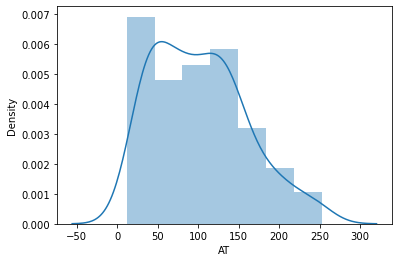

In [36]:
import seaborn as sns
sns.distplot(data['AT'])

Fitting a Linear Regression Model

<AxesSubplot:xlabel='AT'>

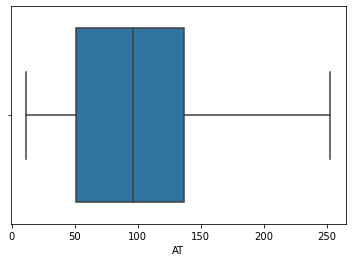

In [37]:
sns.boxplot(data.AT)

# Model Building

In [38]:
import statsmodels.formula.api as smf
model_basic=smf.ols("AT~Waist",data=data).fit()
model_basic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           1.62e-27
Time:                        23:09:13   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Applying Transformations

Text(0, 0.5, 'AT')

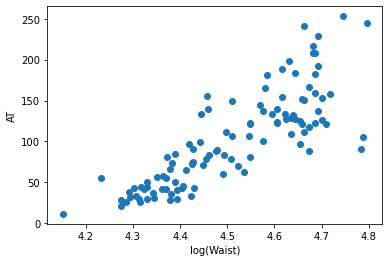

In [40]:
import matplotlib.pyplot as plt
import numpy as np
x=np.log(data.Waist)
y=data.AT
plt.scatter(x,y)
plt.xlabel("log(Waist)")
plt.ylabel("AT")

### Building another model with transformed data

In [41]:
#Applying log transformation on "DEPENDENT VARIABLE"
import statsmodels.formula.api as smf
data["logwaist"]=np.log(data.Waist)
#model with log transformation
model_log=smf.ols("AT~logwaist",data=data).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           6.80e-28
Time:                        23:13:08   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
logwaist     317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'logAT')

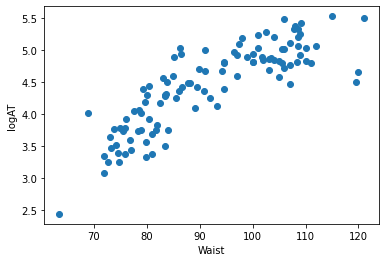

In [42]:
import matplotlib.pyplot as plt
import numpy as np
x=data.Waist
y=np.log(data.AT)
plt.scatter(x,y)
plt.xlabel("Waist")
plt.ylabel("logAT")

In [43]:
#Applying log transformation on "DEPENDENT VARIABLE"
# Exponential model
data["log_AT"]=np.log(data.AT)# creating a column for log of AT

#model with log_at

model_exp=smf.ols("log_AT~Waist",data=data).fit()
model_exp.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_AT   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           2.68e-30
Time:                        23:14:12   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inference:
   **We can observe that the accuracy has increased after applying transformations and AIC values has decreased**

### NOTE: Model is said to be gud when we can get
   **1.The higher the "R-Squared" value** 
   
   **2. Lower the "AIC" value**

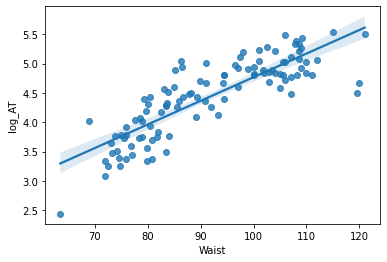

In [46]:
sns.regplot(x="Waist", y="log_AT",data=data);

In [47]:
# As from the above visualization we can observe that log of AT and waist are having a curvilinear relation
# Model with Quadtratic equation y= bo+b1x+b2x^2

data["waist_sq"]=data.Waist*data.Waist

model_quad=smf.ols("log_AT~Waist+waist_sq",data=data).fit()
model_quad.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_AT   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           1.80e-35
Time:                        23:18:49   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
waist_sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## RMSE ( Root mean squared Error)

In [50]:
#calculating RMSE
def RMSE(actual,pred):
    temp=np.sqrt(np.mean((actual-pred)*(actual-pred)))
    return temp

In [51]:
#RMSE for model_basic

pred_basic=model_basic.predict(data)
rmse_basic=RMSE(data.AT,pred_basic)
rmse_basic

32.76017749575514

In [52]:
#RMSE for model_log

pred_log=model_log.predict(data)
rmse_log=RMSE(data.AT,pred_log)
rmse_log

32.49688490932126

In [53]:
#RMSE for model_exp

pred_exp=np.exp(model_exp.predict(data))
rmse_exp=RMSE(data.AT,pred_exp)
rmse_exp

38.529001758071445

In [54]:
#RMSE for model_quad

pred_quad=np.exp(model_quad.predict(data))
rmse_quad=RMSE(data.AT,pred_quad)
rmse_quad

32.24444782776013

In [55]:
model_basic.aic

1073.977181831929

In [56]:
dict={"model":["basic","log","exp","quad"], "RMSE":[rmse_basic,rmse_log,rmse_exp,rmse_quad],"AIC":[model_basic.aic,model_log.aic,model_exp.aic,model_quad.aic]}
rmse_table=pd.DataFrame(dict)
rmse_table

,model,RMSE,AIC
0,basic,32.760177,1073.977182
1,log,32.496885,1072.218044
2,exp,38.529002,84.245794
3,quad,32.244448,55.558112


In [57]:
#Coefficients
model_quad.params


Intercept   -7.824071
Waist        0.228864
waist_sq    -0.001016
dtype: float64

In [58]:
#t and p-Values
print(model_quad.tvalues, '\n', model_quad.pvalues)    

Intercept   -5.311796
Waist        7.107423
waist_sq    -5.870919
dtype: float64 
 Intercept    6.034650e-07
Waist        1.430332e-10
waist_sq     5.028074e-08
dtype: float64


In [59]:
#R squared values
(model_quad.rsquared,model_quad.rsquared_adj)

(0.778981766771361, 0.7748116114274244)

# Predict for new data point

In [60]:
#Predict for 165 Waist
newdata=pd.Series([76,101])

In [61]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])
data_pred["waist_sq"]=data_pred.Waist*data_pred.Waist
np.exp(model_quad.predict(data_pred))

0     40.427511
1    137.554384
dtype: float64